In [1]:
%pylab inline
import rlcompleter, readline
readline.parse_and_bind('tab: complete')

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy
import scipy.io.wavfile
import pylab
import matplotlib

# Computes the Short-Time Fourier Transform (STFT) of a signal, with a given
# window length, and shift between adjacent windows
def stft(x, window_len=4096, window_shift=2048):
	w = scipy.hamming(window_len)
	X = scipy.array([scipy.fft(w*x[i:i+window_len])
		for i in range(0, len(x)-window_len, window_shift)])
	return scipy.absolute(X[:,0:window_len/2])
#stft return a 2-D signal. x-axis is time parameter, y frequency 
#and the value is the amplitude(means volume in audio case)

In [3]:
if __name__ == '__main__':
    rate, data = scipy.io.wavfile.read('../tracks/1.wav')
# Strip out the stereo channel if present
    if(len(data.shape) > 1):
        data = data[:,0]

# Get just the first 10 seconds as our audio signal
x = data[0:10*rate]
X = stft(x)
#spectrogram is 3-D graph, x-axis time, y-axis frequency, color amplitude
def plot_transform(X):
	pylab.ion()
	pylab.figure()
	pylab.imshow(scipy.log(X.T), origin='lower', aspect='auto', interpolation='nearest', norm=matplotlib.colors.Normalize())
#	pylab.xlabel('Window index')
#	pylab.ylabel('Transform coefficient')
	pylab.ioff()
    
def plot_peaks(peak_list,start,end):
    fig = matplotlib.pyplot.figure()
    ax = fig.add_subplot(1,1,1)    
    s_list, f_list = zip(*peak_list)    
    matplotlib.pyplot.plot(s_list, f_list, 'bo',)
    plt.xticks(range(0,250,20))
    ymin, ymax = ax.get_ylim()    
    ax.vlines((start,end),ymin,ymax,'red')
    matplotlib.pyplot.xlabel('Time')
    matplotlib.pyplot.ylabel('Frequency')

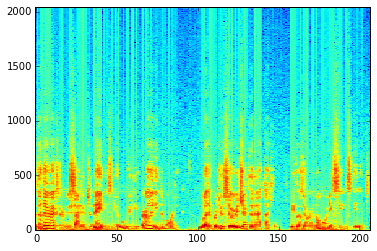

In [4]:
plot_transform(X)

In [5]:
def findPeaks(X,K1,K2):
    peaks = []
    for i in range(0,X.shape[0],K1):
        for j in range(0,X.shape[1],K2): 
            index = np.where(X == X[i:i+K1,j:j+K2].max())
            peaks.append(index)
    index = np.where(X == X[i:,j:].max())
    peaks.append(index)
    return peaks
#peaks = findPeaks(X,20)

In [349]:
if __name__ == '__main__':
    rate, data = scipy.io.wavfile.read('../tracks/1.wav')
# Strip out the stereo channel if present
    if(len(data.shape) > 1):
        data = data[:,0]

# Get just the first 10 seconds as our audio signal
audio1 = data[0:10*rate]
X1 = stft(audio1)
rate, data = scipy.io.wavfile.read('../tracks/2.wav')
# Strip out the stereo channel if present
if(len(data.shape) > 1):
    data = data[:,0]

# Get just the first 10 seconds as our audio signal
audio2 = data[0:10*rate]
X2= stft(audio2)

rate, data = scipy.io.wavfile.read('../tracks/3.wav')
# Strip out the stereo channel if present
if(len(data.shape) > 1):
    data = data[:,0]

# Get just the first 10 seconds as our audio signal
audio3 = data[0:10*rate]
X3= stft(audio3)

rate, data = scipy.io.wavfile.read('../tracks/4.wav')
# Strip out the stereo channel if present
if(len(data.shape) > 1):
    data = data[:,0]

# Get just the first 10 seconds as our audio signal
audio4 = data[0:10*rate]
X4= stft(audio4)

rate, data = scipy.io.wavfile.read('../tracks/inna.wav')
# Strip out the stereo channel if present
if(len(data.shape) > 1):
    data = data[:,0]

# Get just the first 10 seconds as our audio signal
audio_inna = data[0:10*rate]
X_inna= stft(audio_inna)

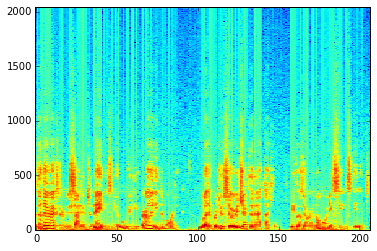

In [7]:
plot_transform(X1)

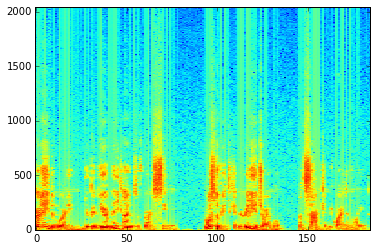

In [8]:
plot_transform(X2)

In [9]:
def hash_table(T,F,N,peaks):
    target_zone = []
    hashTable = {}
    for each in peaks:
        (t1,f1) = each
        target_zone = [(x,y) for x,y in peaks if x>t1 and x<t1+T and y>f1-F and y<f1+F]
#print target_zone[1]
        for each in target_zone[:N]:
            (t2,f2) = each
            t1 = int(t1)
            t2 = int(t2)
            f1 = int(f1)
            f2 = int(f2)
            hash_value = hash((f1+(f1-f2)+(t2-t1)))
            hashTable.setdefault(hash_value,[])
            hashTable[hash_value].append(t1)
    return hashTable
#hashtable1 = hash_table(40,2000,10,peaks1)

In [616]:
peaks1 = findPeaks(X1,20,200)
peaks2 = findPeaks(X2,20,200)
peaks3 = findPeaks(X3,20,200)
peaks4 = findPeaks(X4,20,200)
peaks_inna = findPeaks(X_inna,20,200)

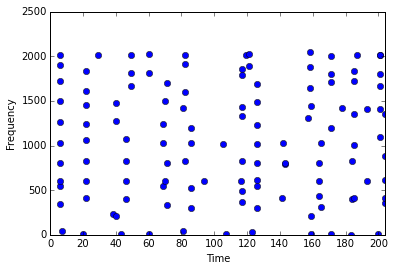

In [617]:
plot_peaks(peaks1,0,0)

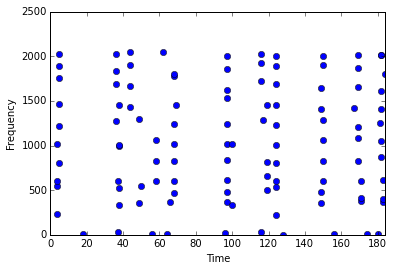

In [618]:
plot_peaks(peaks2,0,0)

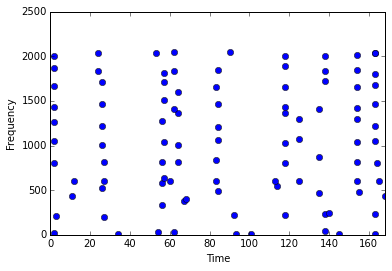

In [619]:
plot_peaks(peaks3,0,0)

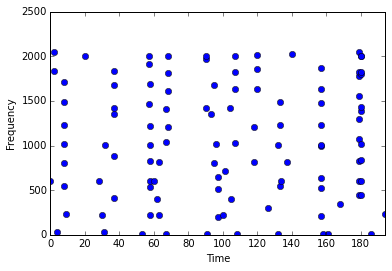

In [620]:
plot_peaks(peaks4,0,0)

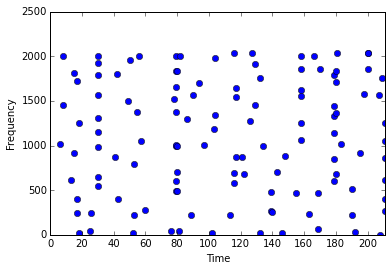

In [621]:
plot_peaks(peaks_inna,0,0)

In [622]:
hashtable1 = hash_table(40,2000,6,peaks1)
hashtable2 = hash_table(40,2000,6,peaks2)
hashtable3 = hash_table(40,2000,6,peaks3)
hashtable4 = hash_table(40,2000,6,peaks4)
hashtable_inna = hash_table(40,2000,6,peaks_inna)
#common_values = sorted(set(hashtable1.keys()) & set(hashtable2.keys()))
#print len(common_values)
#common_values = sorted(common_values)

In [623]:
def getPairs(h1,h2):
    pairs = []
    common_values = sorted(set(h1.keys()) & set(h2.keys()))
    for each in common_values:
        t1 = h1[each]
        t2 = h2[each]
        for i in range(0,len(t1)):
            for j in range(0,len(t2)):
                pairs.append((t1[i],t2[j]))
    print len(set(pairs))
    pairs = list(set(pairs))
    return pairs

In [624]:
pairs1_2 = getPairs(hashtable1,hashtable2)
pairs1_3 = getPairs(hashtable1,hashtable3)
pairs1_4 = getPairs(hashtable1,hashtable4)
pairs1_inna = getPairs(hashtable1,hashtable_inna)

93
74
87
70


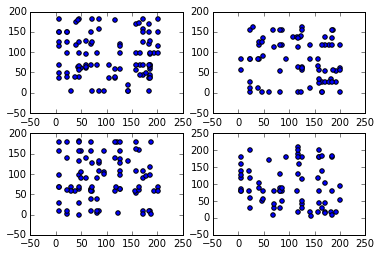

In [625]:
#pairs = np.asarray(pairs)
#print pairs.shape
#print np.asarray(pairs).shape
fig = plt.figure()
ax1 = plt.subplot(221)
ax1.scatter(np.asarray(pairs1_2)[:,0],np.asarray(pairs1_2)[:,1])
ax2 = plt.subplot(222)
ax2.scatter(np.asarray(pairs1_3)[:,0],np.asarray(pairs1_3)[:,1])
ax3 = plt.subplot(223)
ax3.scatter(np.asarray(pairs1_4)[:,0],np.asarray(pairs1_4)[:,1])
ax4 = plt.subplot(224)
ax4.scatter(np.asarray(pairs1_inna)[:,0],np.asarray(pairs1_inna)[:,1])

In [626]:
def Hough(pairs,N):
    space = []
    for each in pairs:
        theta = [int(i) for i in range(0,180,180/N)]
        rho = [int(i) for i in each[0]*np.cos(np.radians(theta)) + each[1]*np.sin(np.radians(theta))]
        space.extend(zip(rho,theta))
    space = list(set(space))
    imax = max(np.asarray(space)[:,0])+1
    jmax = max(np.asarray(space)[:,1])+1
#print imax,jmax
    vote = np.zeros((imax,jmax))
    for point in np.asarray(space):
        for pair in pairs:
#            print point[0],point[1]
            if(point[0] == int(pair[0]*np.cos(np.radians(point[1])) + pair[1]*np.sin(np.radians(point[1])))):
                vote[point[0],point[1]] = vote[point[0],point[1]] + 1
#                print point
#    print vote.shape
    return [vote,space]
#[vote,space] = Hough(pairs,180)

In [627]:
[vote1_2,space1_2] = Hough(pairs1_2,180)
[vote1_3,space1_3] = Hough(pairs1_3,180)
[vote1_4,space1_4] = Hough(pairs1_4,180)
[vote1_inna,space1_2] = Hough(pairs1_inna,180)
#print np.where(vote1_2 == 5)

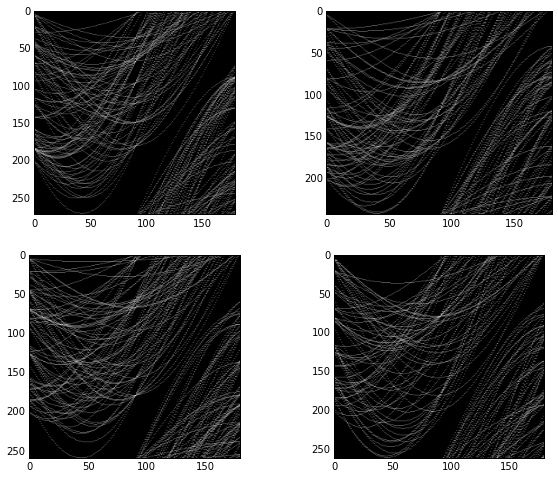

In [628]:
fig = plt.figure(figsize=(10,8))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)
ax1.imshow(np.log(1 + vote1_2),cmap=cm.gray, aspect=1/1.5)
ax2.imshow(np.log(1 + vote1_3),cmap=cm.gray, aspect=1/1.5)
ax3.imshow(np.log(1 + vote1_4),cmap=cm.gray, aspect=1/1.5)
ax4.imshow(np.log(1 + vote1_inna),cmap=cm.gray, aspect=1/1.5)

In [721]:
#print vote
def hough_peaks(pairs,vote):
    plt.scatter(np.asarray(pairs)[:,0],np.asarray(pairs)[:,1])
#    index = np.where(vote == np.max(vote))
    index = []
    for i in range(vote.shape[0]):
        for j in range(40,50):
            if vote[i][j] == np.max(vote[:,40:50]):
                index.append([i,j])
    print index,np.max(vote[:,120:160])
    for each in index:
#        print each
        rho = each[0]
        theta = each[1]
        print theta
        y0 = (rho - 0*np.cos(np.radians(theta)))/np.sin(np.radians(theta))
        y1 = (rho - 250*np.cos(np.radians(theta)))/np.sin(np.radians(theta))
        print np.cos(np.radians(theta))/np.sin(np.radians(theta)) ,y0,y1
        plt.plot([0,250],[y0,y1],'r')
#            plt.xlim(-50,250)
#            plt.ylim(-100,300)

[[156, 48]] 4.0
48
0.900404044298 209.918705819 -15.1823052559


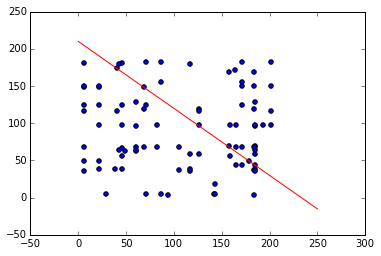

In [722]:
line1_2 = hough_peaks(pairs1_2,vote1_2)

[[162, 41]] 4.0
41
1.15036840722 246.929000046 -40.6631017589


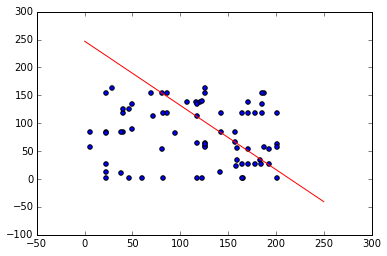

In [723]:
line1_3 = hough_peaks(pairs1_3,vote1_3)

[[136, 40]] 5.0
40
1.19175359259 211.578440453 -86.3599576955


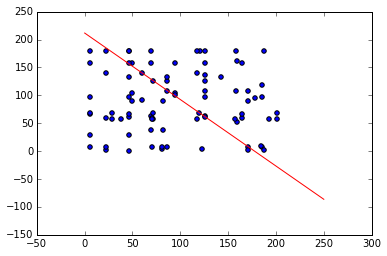

In [724]:
line1_4 = hough_peaks(pairs1_4,vote1_4)

[[113, 45]] 5.0
45
1.0 159.806132548 -90.1938674518


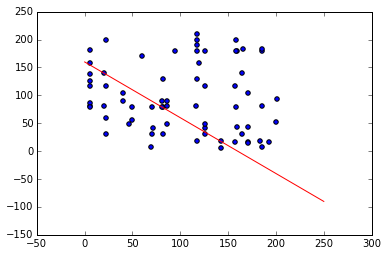

In [815]:
line1_inna = hough_peaks(pairs1_inna,vote1_inna)

In [795]:
from sklearn import linear_model, datasets
pairs = np.asarray(pairs)
def RANSAC(pairs,threshold,iterator,bestScore):
    #pick up to random points
    pairs = np.asarray(pairs)
    x1 = pairs[np.random.randint(0,pairs.shape[0])][0]
    y1 = pairs[np.random.randint(0,pairs.shape[0])][1]
    x2 = pairs[np.random.randint(0,pairs.shape[0])][0]
    y2 = pairs[np.random.randint(0,pairs.shape[0])][1]
#    # fit a line
#    X = pairs[:,0].reshape(pairs.shape[0],1)
    #print X
#    model = linear_model.LinearRegression()
#    model.fit([[x1],[x2]],[y1,y2])
#    y = model.predict(X)
    #doing iteration
    i = 0
    inliers = [[x1,y1],[x2,y2]]
    while(i < iterator):
        #fit new model
        tmp = np.asarray(inliers)
        X = tmp[:,0].reshape(tmp.shape[0],1)
        y = tmp[:,1]
        model.fit(X,y)
        #find inliers
        for point in pairs:
            dist = abs(point[1] - model.predict(point[0]))
#            print dist
            if(dist < threshold):
#                print "inside"
                inliers.append(point)
        #meature the performance of model
#        print inliers
        currentScore = len(inliers)
#        print currentScore
        if(currentScore < bestScore):
            i = i+1
#            threshold = threshold
        else:
            bestModel = model
            bestInliers = inliers
            print "reach the bestScore"
            return [bestModel,bestInliers]
    bestModel = model
    bestInliers = inliers
#    print i
    return [bestModel,bestInliers]
def drawRANSAC(model,inliers,pairs):
    pairs = np.asarray(pairs)
    inliers = np.asarray(inliers)
    X = inliers[:,0].reshape(inliers.shape[0],1)
    y = model.predict(X)
    plt.scatter(pairs[:,0],pairs[:,1])
    inliers = np.asarray(inliers)
    plt.scatter(inliers[:,0],inliers[:,1],c='y',marker='o')    
    plt.plot(X,y,'r')
    #plt.xlim([-50,250])
    #plt.ylim([-100,300])
#    print X,y

reach the bestScore


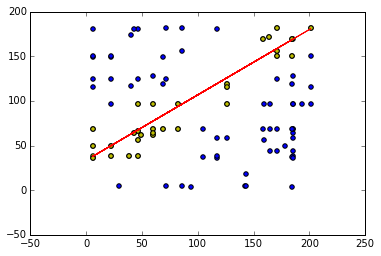

In [837]:
[model1_2,inliers1_2] = RANSAC(pairs1_2,30,100,10)
drawRANSAC(model1_2,inliers1_2,pairs1_2)

reach the bestScore


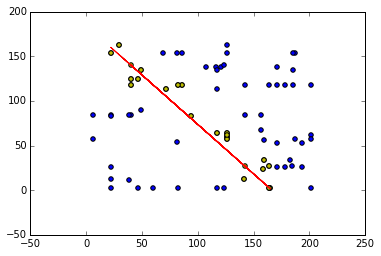

In [826]:
[model1_3,inliers1_3] = RANSAC(pairs1_3,30,100,10)
drawRANSAC(model1_3,inliers1_3,pairs1_3)

reach the bestScore


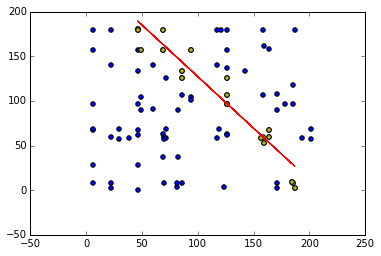

In [829]:
[model1_4,inliers1_4] = RANSAC(pairs1_4,30,100,10)
drawRANSAC(model1_4,inliers1_4,pairs1_4)

reach the bestScore


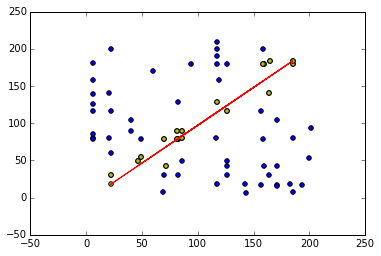

In [824]:
[model1_inna,inliers1_inna] = RANSAC(pairs1_inna,30,100,10)
drawRANSAC(model1_inna,inliers1_inna,pairs1_inna)